# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [6]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: PCA measures the direction of maximum variance, so the components with the highest variance will likely show up as the first PCA dimensions.  Those components are: Fresh, Milk, and Groccery.

(Although we can probably infer by the considerably higher magnitude of the components in those 3 columns that their variance will be higher than the rest, I've verified this assertion by manually calculating the variance myself.)

ICA, on the other hand, is used to separate a signal into its independent and distinct sources.  In this case, our "signal" is the data consisting of how much of each good a customer or business bought from the supplier and the "source" is a customer segment or business sector that tends to purchase each product in very distinct patterns (i.e. lots of Fresh, little Frozen, little Grocery.)


###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


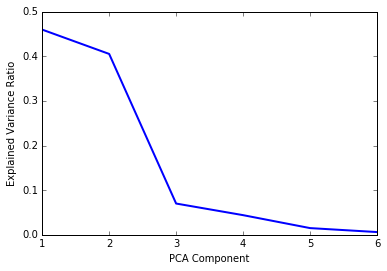

In [7]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
plt.figure(2)
plt.plot([1, 2, 3, 4, 5, 6],pca.explained_variance_ratio_,lw=2)
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The first 2 dimensions account for nearly 86% of all of the variance (46% and 40% respectively) and suddenly drops of to 7% and 4% for the 3rd and 4th components.  It makes sense to use only the first 2 dimensions and only maybe try again with the 3rd dimension added back if the analysis using only the first 2 dimensions ends up unsatisfactory.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension has a highly negative correlation (-0.98) with the first variable: Fresh.  This dimension represents an inverse relationship between spending on Fresh goods and overall spending.  Looking back at the problems the company had with bulk delivery, we can infer from this that the smaller customers probably bought more Fresh foods on average and the bulk delivery probably led to sudden surges in their inventory (and subsequent spoilage.)  Using this information, it may be worth investigating the possibility of cancelling bulk delivery and restoring the previous morning delivery to customers who purchase significant amounts of Fresh foods.

The second dimension has moderately high correlations with the 2nd, 3rd, and 5th variables: Milk, Grocery, and Detergents.  This dimension represents a measure of how much one is spending on Milk, Grocery, and Detergents.  PCA has determined that a significant correlation exists between spending on Milk, Grocery, and Detergents and has decided to combine those two into a single dimension, simplifying our data.  The significantly positive correlations on these 3 components also implies that the larger customers tend to purchase more of these 3 goods.  It's likely that the customers who scored very high on this 2nd PCA dimension complained very little about the bulk delivery; the company should then verify this and if it's true, then continue the bulk delivery for these customers.

###ICA

In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
from sklearn.preprocessing import StandardScaler
myscaler = StandardScaler()
data2 = myscaler.fit_transform(data)
ica.fit(data2)
components2 = 1000*ica.components_
print "Transformed ICA matrix: \n"
print components2.astype(int)
print "\nOriginal ICA matrix:\n"
# Print the independent components
print ica.components_

Transformed ICA matrix: 

[[ -50    6    5    3   -9    2]
 [  -4   -1   -5   -2    2   50]
 [   3  -17 -114    7  134   16]
 [  -1  -72   55    1  -15   17]
 [  -2   13  -61   -1    4    4]
 [ -10   -1    7   54   -2  -16]]

Original ICA matrix:

[[-0.05022877  0.00634026  0.00597759  0.00328277 -0.00987174  0.00293084]
 [-0.00488246 -0.00161847 -0.00569695 -0.00253168  0.00242719  0.05096435]
 [ 0.00377489 -0.01706225 -0.11430272  0.00709847  0.13431367  0.01614208]
 [-0.00194323 -0.0725728   0.05517638  0.00176197 -0.0158296   0.01705941]
 [-0.00265325  0.01386897 -0.06129038 -0.00197502  0.00417696  0.00413663]
 [-0.01092939 -0.00103655  0.00734661  0.05404971 -0.00263946 -0.01676647]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: We'll refer to the following transformed ICA matrix for our analysis:
[[   4    2    5    2   -2  -51]

 [  50   -6   -6   -3   10   -2]
 
 [  -3   17  111   -7 -133  -16]
 
 [   2  -13   66    1  -10   -4]
 
 [   2   72  -55   -1   16  -16]
 
 [ -10    0    7   54   -2  -16]]
 
 
 The first vector, [   4    2    5    2   -2  -51], refers to a business that spends roughly average on everything except Delicatssen items.  If we multiply it by -1, we get [   -4    -2    -5    -2   2  51] which indicates roughly average spending on most items but above average spending on Delicatssen.  This probably corresponds to a Deli or Sandwich shop.
 
 The second vector, [  50   -6   -6   -3   10   -2], refers to a business that spends a disproportionate amount in Fresh produce and a little more than average on Detergents and Paper.  The only type of business that somewhat fits this is a farmer's market store.
 
 The third vector, [  -3   17  111   -7 -133  -16], refers to a business that spends a lot more than average on groceries and a lot less than average on Detergents and Paper products.  If we multiply it by -1, we get [  3   -17  -111   7  133  16], a business that spends a lot on detergents and little on groceries.  A hotel might fit this.
 
 The fourth vector, [   2  -13   66    1  -10   -4], corresponds to a business that spends a lot more on Groceries than everything else.  This is likely a grocery store.
 
 The fifth vector, [   2   72  -55   -1   16  -16], corresponds to a business that buys a disproportionate amount of Milk products and very little Grocery products.  This looks like a cheese maker.
 
 The sixth vector, [ -10    0    7   54   -2  -16], corresponds to a business that buys a ton of frozen foods.  This is likely a convenience store.
 
 These vectors could be used to explore possible customer segmentations and the real-world business that the particular segmentation might correspond to (like I've suggested above.)

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K-Means clustering picks K centers at random when it's initialized and each center annexes its closest points into its respective cluster until all points have been annexed; at this point, the centers for each "cluster" is recomputed.  This process always converges if given enough time but like all hillclimbing algorithms, it's very sensitive to your initial conditions which may get you stuck at a local minima.  To alleviate this, k-means is sometimes run multiple times and the most common resulting clustering is picked as the "answer".  K-means clustering also scales well to very large sample sizes and can be run in parallel on many different proccessors.  

Gaussian Mixture Models, on the other hand, work well for density estimation and is preferable over K-means for larger #'s of clusters.  It assumes your points come from a finite # of Gaussian sources (with unknown parameters.)  One of its biggest perks is its soft-clustering property: rather than decide on a cluster each point belongs to, it assigns a probability which cluster a particular point could go in (and sometimes clusters may even overlap as a result.)  This is very convenient if there are no clear boundaries in the data you've collected.


Since I've not seen any clear boundaries in the data that I've plotted, I've decided to go with GMM instead of K-Means for clustering.  As for picking the # of clusters, I've computed the BIC metric for 1 to 10 clusters (see #6) and found that the BIC score falls sharply for 1-4 and gradually after 4 so I've picked 4 clusters as a tradeoff.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [9]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [10]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca2 = PCA(n_components = 2)
reduced_data = pca2.fit_transform(data)
print "Our PCA vectors (for reference again):\n"
print pca2.fit(data).components_
print "\n1st 10 elements of our reduced data:\n"
print reduced_data[:10]  # print upto 10 elements

Our PCA vectors (for reference again):

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]

1st 10 elements of our reduced data:

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


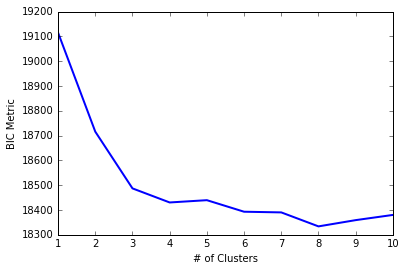

In [13]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
mybic = []
for i in range(1,11):
    testcluster = GMM(n_components = i).fit(reduced_data)
    mybic.append(testcluster.bic(reduced_data))
xlabels = [1,2,3,4,5,6,7,8,9,10]
plt.figure(3)
plt.plot(xlabels,mybic,lw=2)
plt.xlabel("# of Clusters")
plt.ylabel("BIC Metric")
clusters = GMM(n_components = 4).fit(reduced_data)
print clusters

In [16]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [19]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print "Centroids (original):\n"
print pca2.inverse_transform(centroids)
print "\nCentroids (transformed):\n"
print centroids

Centroids (original):

[[  4387.58883765   7725.93510507  11659.78571308   1876.20374531
    4915.33445394   1345.66261137]
 [ 10464.48623811   2046.77258728   2668.80616949   2842.15138026
     442.47506645    982.29103782]
 [ 17391.99624606  24720.80384635  34891.09691913   3862.67267274
   15410.42709335   4134.64356974]
 [ 27335.15002549   5931.98857497   6342.5772474    5469.44826481
    1554.05228151   2378.09511553]]

Centroids (transformed):

[[  7180.76111003   5428.17243393]
 [  2333.99808554  -6720.89070242]
 [ -9426.26939834  34474.89301852]
 [-15325.26498201  -3337.43335973]]


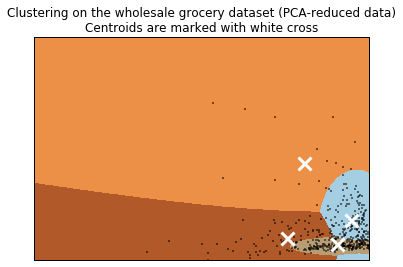

In [18]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Those centroids represent the "average" customer in each cluster (or segment.)

To understand them, we need to first understand the axis of this graph.  The X-axis corresponds to the first PCA vector, [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471], which, as previously discussed, shows a lack of Fresh foods.  The second PCA vector, [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921], shows a fair amount of spending in Milk, Groceries and Detergents

Cluster 1: The X in the brown region, [-15325.26498201  -3337.43335973] is the equivalent of [ 27335.15002549   5931.98857497   6342.5772474    5469.44826481    1554.05228151   2378.09511553] in the original coordinate system.  This looks like a customer with above average spending on Fresh, Frozen, and Delicatessen, average spending on Milk, and below average spending on Grocery and Detergent.  

Cluster 2: The X in the thin tan region to the bottom right, [  2333.99808554  -6720.89070242], is the equivalent of [ 10464.48623811   2046.77258728   2668.80616949   2842.15138026     442.47506645    982.29103782] represents a customer with below average spending on all 6 categories.  A large proportion of customers fall in this cluster.

Cluster 3: The X in the blue region, [  7180.76111003   5428.17243393], is the equivalent of [  4387.58883765   7725.93510507  11659.78571308   1876.20374531    4915.33445394   1345.66261137] in the original coordinate system. This is a customer who spends above average on Milk, Grocery, and Detergent and below average on the rest.  This cluster also houses a fair # of our customers just like the tan region.

Cluster 4: The X in the orange region to the upper left, [ -9426.26939834  34474.89301852], or the equivalent of [ 17391.99624606  24720.80384635  34891.09691913   3862.67267274   15410.42709335   4134.64356974] in the original coordinate system. This represents a customer that spends higher than average on all 6 different categories.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: Personally, I think PCA provided the most insight (and value.)  This technique allows you to calculate new basis vectors that best explain the variance in your data.  It's been found in this particular data set that just the first 2 PCA vectors accounted for about 86% of the variance in the data.  Transforming our 6-dimensional data to these two dimensions not only will make our computations easier from this point on but will also make it practical to visualize it in a plot (something that just can't be done with the original 6-D data.)

**9)** How would you use that technique to help the company design new experiments?

Answer: Use PCA to reduce the dimensionality down from 6 to 2 and run clustering to separate customers into segments.  From this point on, the company should run experiments and perform A/B tests on each customer segment independently instead of testing or making changes across the board.  This way, the company will make separate changes to each customer segment which will hopefully minimize the chances of a repeat of its recent mistake of changing to a bulk evening delivery for everyone.

I've hypothesized that small customers that order a ton of Fresh produce (most likely in Cluster 1) were most adversely affected by the change to bulk deliveries, so one A/B test we can try on Cluster 1 would be to offer them daily deliveries of Fresh products in the mornings and bulk deliveries of the other 5 products and see if this cuts down on the complaints.

**10)** How would you use that data to help you predict future customer needs?

Answer: Once we've done A/B testing on each customer segment to best meet each segment's needs, we can rerun clustering every Month or Quarter to see how the customer base is evolving.  Some businesses grow while others shrink so it's almost certain that some customers will shift to different segments over time.  After taking snapshots of the customer segmentation over time along with the corresponding economic data from the government, it's possible to construct a set of training and test data and fit a regression model for predicting what the customer segmentation will be like in the near future.  This will be valuable information for the distributor to prepare for future demand ahead of time.